In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import seaborn as sns

In [23]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

data = pd.read_csv('england/with_density_no_outliers.csv')


Simple EDA

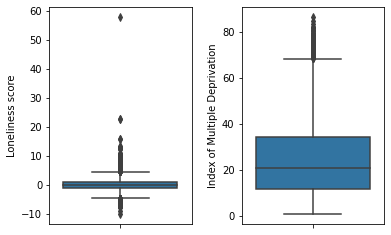

In [3]:
fig, [ax1, ax2] = plt.subplots(1,2)
sns.boxplot(data=data, y='loneills', ax=ax1)
ax1.set_ylabel('Loneliness score')
sns.boxplot(data=data, y='imd_score', ax=ax2)
ax2.set_ylabel('Index of Multiple Deprivation')
fig.subplots_adjust(wspace=.35)
fig.savefig('eda.eps')

In [24]:
data.head()

,lsoa11,population_density,year,loneills,lsoa_name,district_code,district_name,imd_score,imd_rank,imd_decile,income_score,income_rank,income_decile,employment_rate,employment_score,employment_decile,education_score,education_rank,education_decile,health_score,health_rank,health_decile,crime_score,crime_rank,crime_decile,housing_score,housing_rank,housing_decile,living_score,living_rank,living_decile,poor_children_score,poor_children_rank,poor_children_decile,poor_older_score,poor_older_rank,poor_older_decile,young_sub_score,young_sub_rank,young_sub_decile,adult_skills_sub_score,adult_skills_sub_rank,adult_skills_sub_decile,geog_barriers_sub_score,geog_barriers_sub_rank,geog_barriers_sub_decile,wider_barriers_sub_score,wider_barriers_sub_rank,wider_barriers_sub_decile,indoor_sub_score,indoor_sub_rank,indoor_sub_decile,outdoor_sub_score,outdoor_sub_rank,outdoor_sub_decile,total_population,aged_under_15_population,aged_16-59_population,aged_over_60_population,working_age_population
0,E01020636,"1,886",2015,0.651901,County Durham 001C,E06000047,County Durham,21.632,12979.0,4.0,0.189,9118.0,3.0,0.149,9104.0,3.0,25.353,10677.0,4.0,0.609,8137.0,3.0,-0.458,23310.0,8.0,10.978,27725.0,9.0,0.542,32803.0,10.0,0.262,8617.0,3.0,0.255,8104.0,3.0,0.335,11081.0,4.0,0.356,10180.0,4.0,-0.163,18662.0,6.0,-1.172,21896.0,7.0,-1.813,32265.0,10.0,-1.482,31684.0,10.0,1704.0,306.0,956.0,442.0,976.50
1,E01020629,"3,270",2015,0.299419,County Durham 003C,E06000047,County Durham,19.084,14979.0,5.0,0.177,10009.0,4.0,0.151,8942.0,3.0,16.458,16285.0,5.0,0.449,10003.0,4.0,-0.818,27695.0,9.0,9.413,29370.0,9.0,4.349,29981.0,10.0,0.251,9218.0,3.0,0.168,14604.0,5.0,0.167,13573.0,5.0,0.278,18472.0,6.0,-0.083,17234.0,6.0,-2.265,27219.0,9.0,-0.677,25589.0,8.0,-1.215,30432.0,10.0,1488.0,304.0,836.0,348.0,839.25
2,E01020655,242,2015,-0.231131,County Durham 003D,E06000047,County Durham,11.477,22411.0,7.0,0.093,19395.0,6.0,0.080,19844.0,7.0,4.983,27375.0,9.0,0.075,15003.0,5.0,-0.806,27578.0,9.0,28.214,8170.0,3.0,1.521,32427.0,10.0,0.109,20280.0,7.0,0.127,18909.0,6.0,-0.739,26875.0,9.0,0.213,25862.0,8.0,1.149,2665.0,1.0,-3.309,30343.0,10.0,-1.171,29921.0,10.0,-1.748,32368.0,10.0,2039.0,333.0,1115.0,591.0,1142.50
3,E01020661,"2,193",2015,-1.047568,County Durham 004A,E06000047,County Durham,27.441,9495.0,3.0,0.187,9262.0,3.0,0.157,8321.0,3.0,20.617,13334.0,5.0,1.019,4255.0,2.0,0.763,5645.0,2.0,16.587,21029.0,7.0,10.419,23105.0,8.0,0.201,12340.0,4.0,0.240,9037.0,3.0,0.211,12894.0,4.0,0.324,13406.0,5.0,0.116,13849.0,5.0,-0.450,17900.0,6.0,-0.223,19737.0,7.0,-0.446,22845.0,7.0,1841.0,316.0,1046.0,479.0,1073.50
4,E01020615,"2,871",2015,-1.014707,County Durham 005B,E06000047,County Durham,39.224,4745.0,2.0,0.280,4154.0,2.0,0.240,2898.0,1.0,47.978,3547.0,2.0,1.533,1515.0,1.0,-0.107,18172.0,6.0,10.279,28521.0,9.0,2.879,31413.0,10.0,0.318,5882.0,2.0,0.335,4406.0,2.0,0.864,4876.0,2.0,0.480,2789.0,1.0,-0.729,27144.0,9.0,-0.101,15997.0,5.0,-2.075,32597.0,10.0,-0.440,22773.0,7.0,1786.0,352.0,984.0,450.0,981.00


In [8]:
data.columns

Index(['lsoa11', 'year', 'loneills', 'depression_zscore', 'alzheimers_zscore',
       'hypertension_zscore', 'insomnia_zscore', 'addiction_zscore',
       'social anxiety_zscore', 'lsoa_code', 'lsoa_name', 'district_code',
       'district_name', 'imd_score', 'imd_rank', 'imd_decile', 'income_score',
       'income_rank', 'income_decile', 'employment_rate', 'employment_score',
       'employment_decile', 'education_score', 'education_rank',
       'education_decile', 'health_score', 'health_rank', 'health_decile',
       'crime_score', 'crime_rank', 'crime_decile', 'housing_score',
       'housing_rank', 'housing_decile', 'living_score', 'living_rank',
       'living_decile', 'poor_children_score', 'poor_children_rank',
       'poor_children_decile', 'poor_older_score', 'poor_older_rank',
       'poor_older_decile', 'young_sub_score', 'young_sub_rank',
       'young_sub_decile', 'adult_skills_sub_score', 'adult_skills_sub_rank',
       'adult_skills_sub_decile', 'geog_barriers_sub_scor

In [9]:
data.corr()


,year,loneills,depression_zscore,alzheimers_zscore,hypertension_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,imd_score,imd_rank,imd_decile,income_score,income_rank,income_decile,employment_rate,employment_score,employment_decile,education_score,education_rank,education_decile,health_score,health_rank,health_decile,crime_score,crime_rank,crime_decile,housing_score,housing_rank,housing_decile,living_score,living_rank,living_decile,poor_children_score,poor_children_rank,poor_children_decile,poor_older_score,poor_older_rank,poor_older_decile,young_sub_score,young_sub_rank,young_sub_decile,adult_skills_sub_score,adult_skills_sub_rank,adult_skills_sub_decile,geog_barriers_sub_score,geog_barriers_sub_rank,geog_barriers_sub_decile,wider_barriers_sub_score,wider_barriers_sub_rank,wider_barriers_sub_decile,indoor_sub_score,indoor_sub_rank,indoor_sub_decile,outdoor_sub_score,outdoor_sub_rank,outdoor_sub_decile,total_population,aged_under_15_population,aged_16-59_population,aged_over_60_population,working_age_population
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loneills,NaN,1.000000,0.434212,0.454808,0.065684,0.503757,0.394685,0.521653,-0.173878,0.188016,0.185775,-0.196157,0.212058,0.212222,-0.153322,0.186999,0.186160,-0.133487,0.158223,0.157992,-0.133275,0.147330,0.146198,-0.119717,0.132419,0.133657,-0.159479,0.138546,0.134801,-0.062615,0.081497,0.081497,-0.160440,0.184871,0.183179,-0.248205,0.216905,0.213398,-0.054597,0.058344,0.059097,-0.230718,0.223501,0.218850,0.138995,-0.134168,-0.131580,-0.204114,0.173687,0.166078,-0.022199,0.029752,0.029964,-0.130105,0.139025,0.138004,-0.053178,-0.229921,-0.037473,0.128484,-0.025939
depression_zscore,NaN,0.434212,1.000000,-0.005696,-0.408449,0.308253,0.060413,0.095835,0.129701,-0.099598,-0.096311,0.081091,-0.052922,-0.049631,0.159244,-0.113591,-0.108446,0.190931,-0.170509,-0.169157,0.253142,-0.235477,-0.233346,0.051728,-0.034281,-0.033288,-0.233042,0.208706,0.207464,-0.020076,0.074857,0.077729,0.109294,-0.079488,-0.076154,-0.022284,-0.026012,-0.028922,0.262606,-0.257300,-0.255545,0.073529,-0.071058,-0.074212,0.076092,-0.069527,-0.065456,-0.192552,0.144280,0.137631,0.004579,0.003922,0.005246,-0.127112,0.127105,0.126793,-0.036661,-0.192654,0.038028,-0.020843,0.045727
alzheimers_zscore,NaN,0.454808,-0.005696,1.000000,0.021091,0.054322,-0.051842,0.056930,-0.246223,0.247770,0.246056,-0.236351,0.237595,0.235200,-0.219011,0.230560,0.228230,-0.244303,0.272429,0.269594,-0.206600,0.207063,0.204594,-0.161260,0.159273,0.158940,-0.119754,0.111608,0.108668,-0.109141,0.103906,0.102429,-0.223072,0.236531,0.232432,-0.236923,0.218928,0.214812,-0.211583,0.212354,0.209630,-0.293979,0.287606,0.282747,0.027701,-0.021142,-0.021411,-0.120165,0.111259,0.108623,-0.115396,0.116107,0.115338,-0.023931,0.029922,0.030085,-0.072364,-0.170694,-0.080471,0.129248,-0.073423
hypertension_zscore,NaN,0.065684,-0.408449,0.021091,1.000000,-0.284587,-0.140614,-0.049437,-0.293481,0.277842,0.273697,-0.257459,0.237224,0.235359,-0.268636,0.248539,0.245430,-0.218833,0.182554,0.182472,-0.343951,0.349556,0.348311,-0.218610,0.217036,0.215576,-0.032652,0.044747,0.043030,-0.176479,0.152719,0.150508,-0.252328,0.240559,0.240061,-0.260299,0.267487,0.267598,-0.195664,0.195067,0.192523,-0.146557,0.127385,0.128371,0.162378,-0.162946,-0.162756,-0.174561,0.190561,0.190286,-0.093545,0.098142,0.096005,-0.225541,0.232683,0.230137,-0.071595,-0.031050,-0.169603,0.213858,-0.164454
insomnia_zscore,NaN,0.503757,0.308253,0.054322,-0.284587,1.000000,0.033543,0.153313,0.023291,-0.020118,-0.021339,-0.001266,0.007452,0.008597,0.010393,0.007750,0.007585,-0.006693,0.023433,0.023142,0.013102,-0.011736,-0.013192,0.066361,-0.062729,-0.062128,-0.003238,-0.015440,-0.015811,0.096692,-0.087892,-0.087497,0.022048,-0.011756,-0.013927,-0.028805,0.003548,-0.0000

In [25]:

employment_data = data[['lsoa11', 'year', 'loneills', 'lsoa_name', 'district_code',
                            'imd_score', 'imd_rank', 'imd_decile', 'income_score', 'income_rank',
                            'income_decile', 'employment_score', 'employment_rate', 'employment_decile',
                            'poor_children_score', 'poor_children_rank',
                           'poor_children_decile', 'poor_older_score', 'poor_older_rank',
                           'poor_older_decile', 'young_sub_score', 'young_sub_rank',
                           'young_sub_decile', 'adult_skills_sub_score', 'adult_skills_sub_rank',
                           'adult_skills_sub_decile','aged_16-59_population', 'aged_over_60_population',
       'working_age_population']]

In [6]:
employment_data.describe()

,year,loneills,imd_score,imd_rank,imd_decile,income_score,income_rank,income_decile,employment_score,employment_rate,employment_decile,poor_children_score,poor_children_rank,poor_children_decile,poor_older_score,poor_older_rank,poor_older_decile,young_sub_score,young_sub_rank,young_sub_decile,adult_skills_sub_score,adult_skills_sub_rank,adult_skills_sub_decile,aged_16-59_population,aged_over_60_population,working_age_population
count,6270.0,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000
mean,2015.0,0.010557,24.693867,14563.770335,4.943541,0.166182,14229.228549,4.839872,14580.289793,0.133169,4.944498,0.206516,14662.295534,4.967464,0.220244,13796.324242,4.714992,0.076248,15454.240032,5.202711,0.315780,15671.153270,5.280383,1009.625518,367.973525,1015.246132
std,0.0,2.302486,16.638630,9372.991762,2.830964,0.106687,8973.347762,2.717731,9244.528241,0.081638,2.799137,0.136226,9092.500737,2.757127,0.139180,9066.774791,2.743332,0.768597,9195.748959,2.789738,0.117488,9628.714004,2.913138,317.042450,149.562578,314.088414
min,2015.0,-10.184835,0.578000,3.000000,1.000000,0.005000,2.000000,1.000000,5.000000,0.006000,1.000000,0.004000,1.000000,1.000000,0.007000,1.000000,1.000000,-2.569000,1.000000,1.000000,0.034000,5.000000,1.000000,384.000000,9.000000,400.500000
25%,2015.0,-1.224806,11.467750,6436.250000,2.000000,0.082000,6579.500000,3.000000,6638.500000,0.072000,3.000000,0.093000,6745.500000,3.000000,0.113000,5941.250000,2.000000,-0.447750,7577.250000,3.000000,0.231000,7205.500000,3.000000,825.000000,260.000000,834.500000
50%,2015.0,-0.086967,20.743500,13665.000000,5.000000,0.139000,13520.000000,5.000000,13766.500000,0.112000,5.000000,0.176000,14024.500000,5.000000,0.186000,13040.500000,4.000000,0.079000,14952.000000,5.000000,0.307000,15201.000000,5.000000,952.000000,350.000000,956.000000
75%,2015.0,1.104685,34.233500,22427.500000,7.000000,0.228750,21320.750000,7.000000,22027.750000,0.177000,7.000000,0.298000,22176.750000,7.000000,0.299000,20821.750000,7.000000,0.600000,23159.250000,8.000000,0.394000,23906.000000,8.000000,1119.000000,455.750000,1120.000000
max,2015.0,57.893852,86.444000,32841.000000,10.000000,0.636000,32843.000000,10.000000,32836.000000,0.529000,10.000000,0.916000,32844.000000,10.000000,0.980000,32844.000000,10.000000,2.906000,32841.000000,10.000000,0.673000,32840.000000,10.000000,7656.000000,1173.000000,7743.000000


## Correlation

In [26]:
to_corr = employment_data.drop(['lsoa11', 'year', 'lsoa_name', 'district_code'], axis=1)

In [27]:
to_corr.dtypes

loneills                   float64
imd_score                  float64
imd_rank                   float64
imd_decile                 float64
income_score               float64
income_rank                float64
income_decile              float64
employment_score           float64
employment_rate            float64
employment_decile          float64
poor_children_score        float64
poor_children_rank         float64
poor_children_decile       float64
poor_older_score           float64
poor_older_rank            float64
poor_older_decile          float64
young_sub_score            float64
young_sub_rank             float64
young_sub_decile           float64
adult_skills_sub_score     float64
adult_skills_sub_rank      float64
adult_skills_sub_decile    float64
aged_16-59_population      float64
aged_over_60_population    float64
working_age_population     float64
dtype: object

In [14]:
to_corr.corr(method='spearman')

,loneills,imd_score,imd_rank,imd_decile,income_score,income_rank,income_decile,employment_score,employment_rate,employment_decile,poor_children_score,poor_children_rank,poor_children_decile,poor_older_score,poor_older_rank,poor_older_decile,young_sub_score,young_sub_rank,young_sub_decile,adult_skills_sub_score,adult_skills_sub_rank,adult_skills_sub_decile,aged_16-59_population,aged_over_60_population,working_age_population
loneills,1.000000,-0.220657,0.220657,0.219607,-0.239186,0.239174,0.239454,0.206180,-0.206227,0.206881,-0.213570,0.213612,0.211600,-0.253869,0.253847,0.248890,-0.069472,0.069472,0.070515,-0.241828,0.241815,0.236480,-0.109095,0.165768,-0.096780
imd_score,-0.220657,1.000000,-1.000000,-0.994412,0.954375,-0.954383,-0.948426,-0.933110,0.933087,-0.927697,0.902157,-0.902160,-0.897283,0.884953,-0.884957,-0.879169,0.737276,-0.737274,-0.731741,0.771982,-0.771963,-0.769294,0.226320,-0.422984,0.204567
imd_rank,0.220657,-1.000000,1.000000,0.994412,-0.954374,0.954382,0.948426,0.933109,-0.933086,0.927696,-0.902156,0.902159,0.897282,-0.884953,0.884957,0.879168,-0.737278,0.737275,0.731742,-0.771983,0.771964,0.769295,-0.226320,0.422983,-0.204568
imd_decile,0.219607,-0.994412,0.994412,1.000000,-0.949171,0.949178,0.944342,0.927238,-0.927217,0.923006,-0.897641,0.897642,0.893440,-0.879016,0.879025,0.873318,-0.730665,0.730664,0.725388,-0.765728,0.765709,0.763365,-0.228362,0.421074,-0.206638
income_score,-0.239186,0.954375,-0.954374,-0.949171,1.000000,-0.999993,-0.994143,-0.952725,0.952676,-0.947381,0.939494,-0.939498,-0.934265,0.890434,-0.890437,-0.884336,0.718323,-0.718323,-0.712855,0.797067,-0.797060,-0.792974,0.171933,-0.382964,0.148200
income_rank,0.239174,-0.954383,0.954382,0.949178,-0.999993,1.000000,0.994154,0.952722,-0.952673,0.947378,-0.939504,0.939508,0.934278,-0.890466,0.890469,0.884362,-0.718342,0.718342,0.712872,-0.797090,0.797084,0.792994,-0.171940,0.383019,-0.148205
income_decile,0.239454,-0.948426,0.948426,0.944342,-0.994143,0.994154,1.000000,0.947079,-0.947034,0.942632,-0.934119,0.934122,0.929565,-0.884739,0.884741,0.878966,-0.712930,0.712929,0.707598,-0.791964,0.791959,0.788432,-0.173295,0.379938,-0.149881
employment_score,0.206180,-0.933110,0.933109,0.927238,-0.952725,0.952722,0.947079,1.000000,-0.999987,0.994404,-0.859548,0.859531,0.854035,-0.800066,0.800073,0.794177,-0.715236,0.715234,0.709959,-0.821467,0.821461,0.817557,-0.065790,0.267231,-0.046592
employment_rate,-0.206227,0.933087,-0.933086,-0.927217,0.952676,-0.952673,-0.947034,-0.999987,1.000000,-0.994387,0.859507,-0.859490,-0.853995,0.799989,-0.799996,-0.794106,0.715247,-0.715246,-0.709976,0.821517,-0.821510,-0.817609,0.065676,-0.267209,0.046477
employment_decile,0.206881,-0.927697,0.927696,0.923006,-0.947381,0.947378,0.942632,0.994404,-0.994387,1.000000,-0.854537,0.854517,0.849400,-0.795853,0.795856,0.790265,-0.709087,0.709085,0.703799,-0.816341,0.816327,0.812662,-0.069219,0.266599,-0.049835


<AxesSubplot:>

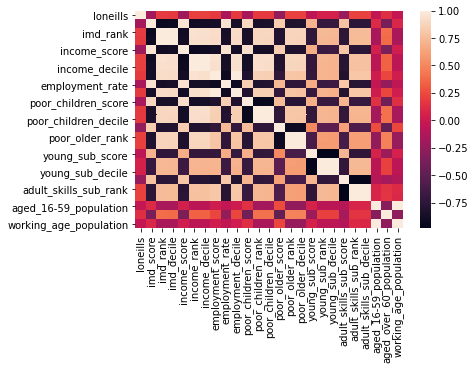

In [15]:
sns.heatmap(to_corr.corr())

<AxesSubplot:xlabel='adult_skills_sub_rank', ylabel='loneills'>

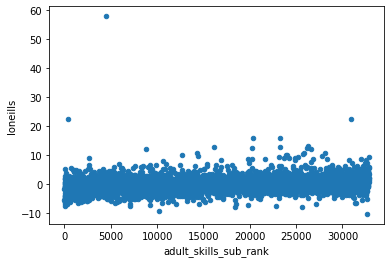

In [16]:
to_corr.plot.scatter(x='adult_skills_sub_rank', y='loneills')



Try with standardisation (z-score)

In [17]:
cols = list(to_corr.columns)
cols.remove('loneills')

In [18]:
cols


['imd_score',
 'imd_rank',
 'imd_decile',
 'income_score',
 'income_rank',
 'income_decile',
 'employment_score',
 'employment_rate',
 'employment_decile',
 'poor_children_score',
 'poor_children_rank',
 'poor_children_decile',
 'poor_older_score',
 'poor_older_rank',
 'poor_older_decile',
 'young_sub_score',
 'young_sub_rank',
 'young_sub_decile',
 'adult_skills_sub_score',
 'adult_skills_sub_rank',
 'adult_skills_sub_decile',
 'aged_16-59_population',
 'aged_over_60_population',
 'working_age_population']

In [19]:
for col in cols:
    col_zscore = col + '_zscore'
    to_corr[col_zscore] = (to_corr[col] - to_corr[col].mean())/to_corr[col].std(ddof=0)

In [20]:
to_corr.head()

,loneills,imd_score,imd_rank,imd_decile,income_score,income_rank,income_decile,employment_score,employment_rate,employment_decile,poor_children_score,poor_children_rank,poor_children_decile,poor_older_score,poor_older_rank,poor_older_decile,young_sub_score,young_sub_rank,young_sub_decile,adult_skills_sub_score,adult_skills_sub_rank,adult_skills_sub_decile,aged_16-59_population,aged_over_60_population,working_age_population,imd_score_zscore,imd_rank_zscore,imd_decile_zscore,income_score_zscore,income_rank_zscore,income_decile_zscore,employment_score_zscore,employment_rate_zscore,employment_decile_zscore,poor_children_score_zscore,poor_children_rank_zscore,poor_children_decile_zscore,poor_older_score_zscore,poor_older_rank_zscore,poor_older_decile_zscore,young_sub_score_zscore,young_sub_rank_zscore,young_sub_decile_zscore,adult_skills_sub_score_zscore,adult_skills_sub_rank_zscore,adult_skills_sub_decile_zscore,aged_16-59_population_zscore,aged_over_60_population_zscore,working_age_population_zscore
0,-3.032939,42.513,3778.0,2.0,0.300,3337.0,2.0,4952.0,0.202,2.0,0.380,3493.0,2.0,0.356,3680.0,2.0,-0.350,21697.0,7.0,0.251,21531.0,7.0,1003.0,103.0,979.50,1.071035,-1.150820,-1.039849,1.254402,-1.213939,-1.045026,-1.041595,0.843187,-1.052014,1.273602,-1.228505,-1.076374,0.975479,-1.115847,-0.989748,-0.554624,0.678929,0.644301,-0.551422,0.608629,0.590344,-0.020900,-1.771798,-0.113818
1,-6.786468,33.412,6750.0,3.0,0.219,7136.0,3.0,10781.0,0.134,4.0,0.283,7497.0,3.0,0.385,2821.0,1.0,-0.134,18431.0,6.0,0.277,18554.0,6.0,1257.0,242.0,1233.50,0.524011,-0.833714,-0.686584,0.495111,-0.790540,-0.677042,-0.411010,0.010177,-0.337451,0.561493,-0.788107,-0.713649,1.183859,-1.210596,-1.354298,-0.273570,0.323736,0.285816,-0.330104,0.299425,0.247044,0.780319,-0.842347,0.694936
2,-1.346273,30.914,7796.0,3.0,0.197,8548.0,3.0,20399.0,0.078,7.0,0.317,5897.0,2.0,0.494,881.0,1.0,0.159,13706.0,5.0,0.228,24261.0,8.0,2241.0,138.0,2226.25,0.373867,-0.722108,-0.686584,0.288884,-0.633173,-0.677042,0.629472,-0.675831,0.734393,0.811099,-0.964091,-1.076374,1.967082,-1.424581,-1.354298,0.107675,-0.190129,-0.072669,-0.747202,0.892179,0.933644,3.884252,-1.537763,3.855922
3,-2.063601,36.910,5475.0,2.0,0.263,4886.0,2.0,12035.0,0.124,4.0,0.346,4709.0,2.0,0.395,2532.0,1.0,0.439,9568.0,3.0,0.283,17915.0,6.0,1282.0,106.0,1248.50,0.734262,-0.969754,-1.039849,0.907565,-1.041303,-1.045026,-0.275351,-0.112324,-0.337451,1.023997,-1.094758,-1.076374,1.255714,-1.242473,-1.354298,0.472004,-0.640156,-0.789639,-0.279031,0.233056,0.247044,0.859179,-1.751738,0.742697
4,-0.972582,40.563,4357.0,2.0,0.292,3642.0,2.0,4436.0,0.210,2.0,0.437,1891.0,1.0,0.313,5283.0,2.0,0.328,11189.0,4.0,0.403,6637.0,3.0,991.0,222.0,957.00,0.953828,-1.089042,-1.039849,1.179410,-1.179947,-1.045026,-1.097417,0.941188,-1.052014,1.692058,-1.404709,-1.439100,0.666501,-0.939033,-0.989748,0.327574,-0.463864,-0.431154,0.742435,-0.938326,-0.782855,-0.058752,-0.976081,-0.185460


In [21]:
to_corr.corr()

,loneills,imd_score,imd_rank,imd_decile,income_score,income_rank,income_decile,employment_score,employment_rate,employment_decile,poor_children_score,poor_children_rank,poor_children_decile,poor_older_score,poor_older_rank,poor_older_decile,young_sub_score,young_sub_rank,young_sub_decile,adult_skills_sub_score,adult_skills_sub_rank,adult_skills_sub_decile,aged_16-59_population,aged_over_60_population,working_age_population,imd_score_zscore,imd_rank_zscore,imd_decile_zscore,income_score_zscore,income_rank_zscore,income_decile_zscore,employment_score_zscore,employment_rate_zscore,employment_decile_zscore,poor_children_score_zscore,poor_children_rank_zscore,poor_children_decile_zscore,poor_older_score_zscore,poor_older_rank_zscore,poor_older_decile_zscore,young_sub_score_zscore,young_sub_rank_zscore,young_sub_decile_zscore,adult_skills_sub_score_zscore,adult_skills_sub_rank_zscore,adult_skills_sub_decile_zscore,aged_16-59_population_zscore,aged_over_60_population_zscore,working_age_population_zscore
loneills,1.000000,-0.173878,0.188016,0.185775,-0.196157,0.212058,0.212222,0.186999,-0.153322,0.186160,-0.160440,0.184871,0.183179,-0.248205,0.216905,0.213398,-0.054597,0.058344,0.059097,-0.230718,0.223501,0.218850,-0.037473,0.128484,-0.025939,-0.173878,0.188016,0.185775,-0.196157,0.212058,0.212222,0.186999,-0.153322,0.186160,-0.160440,0.184871,0.183179,-0.248205,0.216905,0.213398,-0.054597,0.058344,0.059097,-0.230718,0.223501,0.218850,-0.037473,0.128484,-0.025939
imd_score,-0.173878,1.000000,-0.927104,-0.916139,0.965120,-0.891805,-0.881514,-0.875721,0.950037,-0.865481,0.894260,-0.845243,-0.836735,0.831633,-0.819572,-0.811607,0.710208,-0.699253,-0.692336,0.787562,-0.749717,-0.745020,0.109331,-0.376071,0.091574,1.000000,-0.927104,-0.916139,0.965120,-0.891805,-0.881514,-0.875721,0.950037,-0.865481,0.894260,-0.845243,-0.836735,0.831633,-0.819572,-0.811607,0.710208,-0.699253,-0.692336,0.787562,-0.749717,-0.745020,0.109331,-0.376071,0.091574
imd_rank,0.188016,-0.927104,1.000000,0.994841,-0.891520,0.946755,0.941739,0.924100,-0.860454,0.919719,-0.857515,0.896686,0.892214,-0.807313,0.883601,0.878187,-0.733394,0.739937,0.734438,-0.752643,0.757677,0.756125,-0.160956,0.389435,-0.143794,-0.927104,1.000000,0.994841,-0.891520,0.946755,0.941739,0.924100,-0.860454,0.919719,-0.857515,0.896686,0.892214,-0.807313,0.883601,0.878187,-0.733394,0.739937,0.734438,-0.752643,0.757677,0.756125,-0.160956,0.389435,-0.143794
imd_decile,0.185775,-0.916139,0.994841,1.000000,-0.881410,0.941377,0.937115,0.918392,-0.848798,0.914814,-0.849772,0.891886,0.887964,-0.799406,0.877607,0.872313,-0.725173,0.733221,0.728025,-0.744310,0.751525,0.750212,-0.160450,0.387235,-0.143329,-0.916139,0.994841,1.000000,-0.881410,0.941377,0.937115,0.918392,-0.848798,0.914814,-0.849772,0.891886,0.887964,-0.799406,0.877607,0.872313,-0.725173,0.733221,0.728025,-0.744310,0.751525,0.750212,-0.160450,0.387235,-0.143329
income_score,-0.196157,0.965120,-0.891520,-0.881410,1.000000,-0.928077,-0.917288,-0.889007,0.950760,-0.879156,0.930448,-0.878552,-0.869418,0.839827,-0.826749,-0.818026,0.685366,-0.676819,-0.670167,0.806282,-0.768827,-0.763016,0.050391,-0.357703,0.030040,0.965120,-0.891520,-0.881410,1.000000,-0.928077,-0.917288,-0.889007,0.950760,-0.879156,0.930448,-0.878552,-0.869418,0.839827,-0.826749,-0.818026,0.685366,-0.676819,-0.670167,0.806282,-0.768827,-0.763016,0.050391,-0.357703,0.030040
income_rank,0.212058,-0.891805,0.946755,0.941377,-0.928077,1.000000,0.994329,0.949701,-0.874316,0.944514,-0.887713,0.937497,0.932329,-0.808082,0.893118,0.887210,-0.717866,0.722381,0.716630,-0.784285,0.786168,0.782408,-0.072697,0.345930,-0.053954,-0.891805,0.946755,0.941377,-0.928077,1.000000,0.994329,0.949701,-0.874316,0.944514,-0.887713,0.937497,0.932329,-0.808082,0.893118,0.887210,-0.717866,0.722381,0.716630,-0.784285,0.786168,0.782408,-0.072697,0.345930,-0.053954
income_decile,0.212222,-0.881514,0.941739,0.937115,-0.917288,0.994329,1.000000,0.944509,-0.863499,0.940052,-0.879074,0.932421,0.927767,-0.800751

## Maps

In [22]:
lsoa_shapes = gpd.read_file('england/geodata')

In [23]:
lsoa_shapes.head()

,OBJECTID,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,Shape__Are,Shape__Len,geometry
0,1,E01000034,Barking and Dagenham 003A,550689,186433,0.172296,51.5567,6006.847623,513659.108139,6006.847623,"POLYGON ((550783.502 186822.004, 550783.084 18..."
1,2,E01000035,Barking and Dagenham 010A,549957,185575,0.161380,51.5491,3609.905134,397161.416611,3609.905134,"POLYGON ((550266.910 185957.709, 550269.100 18..."
2,3,E01000036,Barking and Dagenham 010B,550645,185231,0.171148,51.5459,4393.928508,418688.296730,4393.928508,"POLYGON ((549843.501 185417.140, 549850.000 18..."
3,4,E01000037,Barking and Dagenham 003B,551195,187087,0.179870,51.5624,2905.634678,233433.350609,2905.634678,"POLYGON ((551550.056 187364.705, 551528.633 18..."
4,5,E01000038,Barking and Dagenham 003C,550700,187149,0.172761,51.5631,2305.558903,214045.771782,2305.558903,"POLYGON ((550920.362 187341.138, 550921.876 18..."


In [24]:
lsoa_shapes.shape


(34753, 11)

In [25]:
prova = pd.concat([employment_data['lsoa11'], to_corr],axis=1)
prova.head()

,lsoa11,loneills,imd_score,imd_rank,imd_decile,income_score,income_rank,income_decile,employment_score,employment_rate,employment_decile,poor_children_score,poor_children_rank,poor_children_decile,poor_older_score,poor_older_rank,poor_older_decile,young_sub_score,young_sub_rank,young_sub_decile,adult_skills_sub_score,adult_skills_sub_rank,adult_skills_sub_decile,aged_16-59_population,aged_over_60_population,working_age_population,imd_score_zscore,imd_rank_zscore,imd_decile_zscore,income_score_zscore,income_rank_zscore,income_decile_zscore,employment_score_zscore,employment_rate_zscore,employment_decile_zscore,poor_children_score_zscore,poor_children_rank_zscore,poor_children_decile_zscore,poor_older_score_zscore,poor_older_rank_zscore,poor_older_decile_zscore,young_sub_score_zscore,young_sub_rank_zscore,young_sub_decile_zscore,adult_skills_sub_score_zscore,adult_skills_sub_rank_zscore,adult_skills_sub_decile_zscore,aged_16-59_population_zscore,aged_over_60_population_zscore,working_age_population_zscore
0,E01000007,-3.032939,42.513,3778.0,2.0,0.300,3337.0,2.0,4952.0,0.202,2.0,0.380,3493.0,2.0,0.356,3680.0,2.0,-0.350,21697.0,7.0,0.251,21531.0,7.0,1003.0,103.0,979.50,1.071035,-1.150820,-1.039849,1.254402,-1.213939,-1.045026,-1.041595,0.843187,-1.052014,1.273602,-1.228505,-1.076374,0.975479,-1.115847,-0.989748,-0.554624,0.678929,0.644301,-0.551422,0.608629,0.590344,-0.020900,-1.771798,-0.113818
1,E01000009,-6.786468,33.412,6750.0,3.0,0.219,7136.0,3.0,10781.0,0.134,4.0,0.283,7497.0,3.0,0.385,2821.0,1.0,-0.134,18431.0,6.0,0.277,18554.0,6.0,1257.0,242.0,1233.50,0.524011,-0.833714,-0.686584,0.495111,-0.790540,-0.677042,-0.411010,0.010177,-0.337451,0.561493,-0.788107,-0.713649,1.183859,-1.210596,-1.354298,-0.273570,0.323736,0.285816,-0.330104,0.299425,0.247044,0.780319,-0.842347,0.694936
2,E01000010,-1.346273,30.914,7796.0,3.0,0.197,8548.0,3.0,20399.0,0.078,7.0,0.317,5897.0,2.0,0.494,881.0,1.0,0.159,13706.0,5.0,0.228,24261.0,8.0,2241.0,138.0,2226.25,0.373867,-0.722108,-0.686584,0.288884,-0.633173,-0.677042,0.629472,-0.675831,0.734393,0.811099,-0.964091,-1.076374,1.967082,-1.424581,-1.354298,0.107675,-0.190129,-0.072669,-0.747202,0.892179,0.933644,3.884252,-1.537763,3.855922
3,E01000012,-2.063601,36.910,5475.0,2.0,0.263,4886.0,2.0,12035.0,0.124,4.0,0.346,4709.0,2.0,0.395,2532.0,1.0,0.439,9568.0,3.0,0.283,17915.0,6.0,1282.0,106.0,1248.50,0.734262,-0.969754,-1.039849,0.907565,-1.041303,-1.045026,-0.275351,-0.112324,-0.337451,1.023997,-1.094758,-1.076374,1.255714,-1.242473,-1.354298,0.472004,-0.640156,-0.789639,-0.279031,0.233056,0.247044,0.859179,-1.751738,0.742697
4,E01000017,-0.972582,40.563,4357.0,2.0,0.292,3642.0,2.0,4436.0,0.210,2.0,0.437,1891.0,1.0,0.313,5283.0,2.0,0.328,11189.0,4.0,0.403,6637.0,3.0,991.0,222.0,957.00,0.953828,-1.089042,-1.039849,1.179410,-1.179947,-1.045026,-1.097417,0.941188,-1.052014,1.692058,-1.404709,-1.439100,0.666501,-0.939033,-0.989748,0.327574,-0.463864,-0.431154,0.742435,-0.938326,-0.782855,-0.058752,-0.976081,-0.185460


In [26]:
scaled_geo_loneliness_imd = lsoa_shapes.merge(prova, how='inner', left_on=['LSOA11CD'], right_on=['lsoa11'])
scaled_geo_loneliness_imd.head()

,OBJECTID,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,Shape__Are,Shape__Len,geometry,lsoa11,loneills,imd_score,imd_rank,imd_decile,income_score,income_rank,income_decile,employment_score,employment_rate,employment_decile,poor_children_score,poor_children_rank,poor_children_decile,poor_older_score,poor_older_rank,poor_older_decile,young_sub_score,young_sub_rank,young_sub_decile,adult_skills_sub_score,adult_skills_sub_rank,adult_skills_sub_decile,aged_16-59_population,aged_over_60_population,working_age_population,imd_score_zscore,imd_rank_zscore,imd_decile_zscore,income_score_zscore,income_rank_zscore,income_decile_zscore,employment_score_zscore,employment_rate_zscore,employment_decile_zscore,poor_children_score_zscore,poor_children_rank_zscore,poor_children_decile_zscore,poor_older_score_zscore,poor_older_rank_zscore,poor_older_decile_zscore,young_sub_score_zscore,young_sub_rank_zscore,young_sub_decile_zscore,adult_skills_sub_score_zscore,adult_skills_sub_rank_zscore,adult_skills_sub_decile_zscore,aged_16-59_population_zscore,aged_over_60_population_zscore,working_age_population_zscore
0,3,E01000036,Barking and Dagenham 010B,550645,185231,0.171148,51.5459,4393.928508,418688.296730,4393.928508,"POLYGON ((549843.501 185417.140, 549850.000 18...",E01000036,-1.288559,20.949,13503.0,5.0,0.142,13220.0,5.0,15950.0,0.099,5.0,0.219,11142.0,4.0,0.145,16954.0,6.0,-0.330,21408.0,7.0,0.364,9491.0,3.0,856.0,214.0,832.75,-0.225089,-0.113182,0.019945,-0.226684,-0.112479,0.058924,0.148176,-0.418578,0.019830,0.091648,-0.387196,-0.350924,-0.540668,0.348297,0.468449,-0.528600,0.647499,0.644301,0.410458,-0.641897,-0.782855,-0.484597,-1.029574,-0.581081
1,4,E01000037,Barking and Dagenham 003B,551195,187087,0.179870,51.5624,2905.634678,233433.350609,2905.634678,"POLYGON ((551550.056 187364.705, 551528.633 18...",E01000037,-0.900648,20.079,14189.0,5.0,0.147,12774.0,4.0,8692.0,0.153,3.0,0.195,12732.0,4.0,0.108,21511.0,7.0,-0.091,17713.0,6.0,0.350,10773.0,4.0,1144.0,301.0,1138.50,-0.277381,-0.039987,0.019945,-0.179814,-0.162185,-0.309059,-0.636999,0.242930,-0.694733,-0.084544,-0.212312,-0.350924,-0.806533,0.850941,0.832998,-0.217619,0.245650,0.285816,0.291287,-0.508743,-0.439555,0.423871,-0.447832,0.392449
2,7,E01000040,Barking and Dagenham 019A,545597,184006,0.097895,51.5362,2286.961839,170708.136826,2286.961839,"POLYGON ((545806.481 184158.048, 545806.760 18...",E01000040,-2.035984,34.713,6266.0,2.0,0.266,4744.0,2.0,5777.0,0.189,2.0,0.341,4941.0,2.0,0.343,4093.0,2.0,0.081,14921.0,5.0,0.408,6320.0,2.0,933.0,256.0,937.25,0.602209,-0.885356,-1.039849,0.935687,-1.057129,-1.045026,-0.952346,0.683935,-1.052014,0.987290,-1.069241,-1.076374,0.882067,-1.070292,-0.989748,0.006183,-0.057992,-0.072669,0.784996,-0.971251,-1.126155,-0.241708,-0.748733,-0.248345
3,9,E01000042,Barking and Dagenham 017B,546119,184117,0.105462,51.5370,2610.109729,231229.836655,2610.109729,"POLYGON ((546603.292 184212.322, 546602.973 18...",E01000042,7.125784,43.898,3446.0,2.0,0.338,2070.0,1.0,3127.0,0.234,1.0,0.409,2587.0,1.0,0.405,2336.0,1.0,0.472,9153.0,3.0,0.414,5889.0,2.0,1099.0,192.0,1082.00,1.154282,-1.186244,-1.039849,1.610612,-1.355146,-1.413009,-1.239025,1.235192,-1.409296,1.486501,-1.328156,-1.439100,1.327570,-1.264092,-1.354298,0.514943,-0.685289,-0.789639,0.836069,-1.016017,-1.126155,0.281923,-1.176682,0.212549
4,14,E01000048,Barking and Dagenham 021B,544636,183479,0.083833,51.5317,1597.258144,64692.501312,1597.258144,"POLYGON ((544635.516 183634.000, 544637.746 18...",E01000048,-1.689397,49.278,2351.0,1.0,0.380,1149.0,1.0,2660.0,0.245,1.0,0.402,2774.0,1.0,0.640,154.0,1.0,-0.017,16492.0,6.0,0.405,6486.0,2.0,1000.0,97.0,976.00,1.477651,-1.303079,-1.393114,2.004319,-1.457792,-1.413009,-1.289546,1.369943,-1.409296,1.435112,-1.307588,-1.439100,3.016169,-1.504770,-1.354298,-0.121332,0.112861,0.285816,0.759459,-0.954010,-1.126155,-0.030363,-1.811918,-0.124962


<AxesSubplot:>

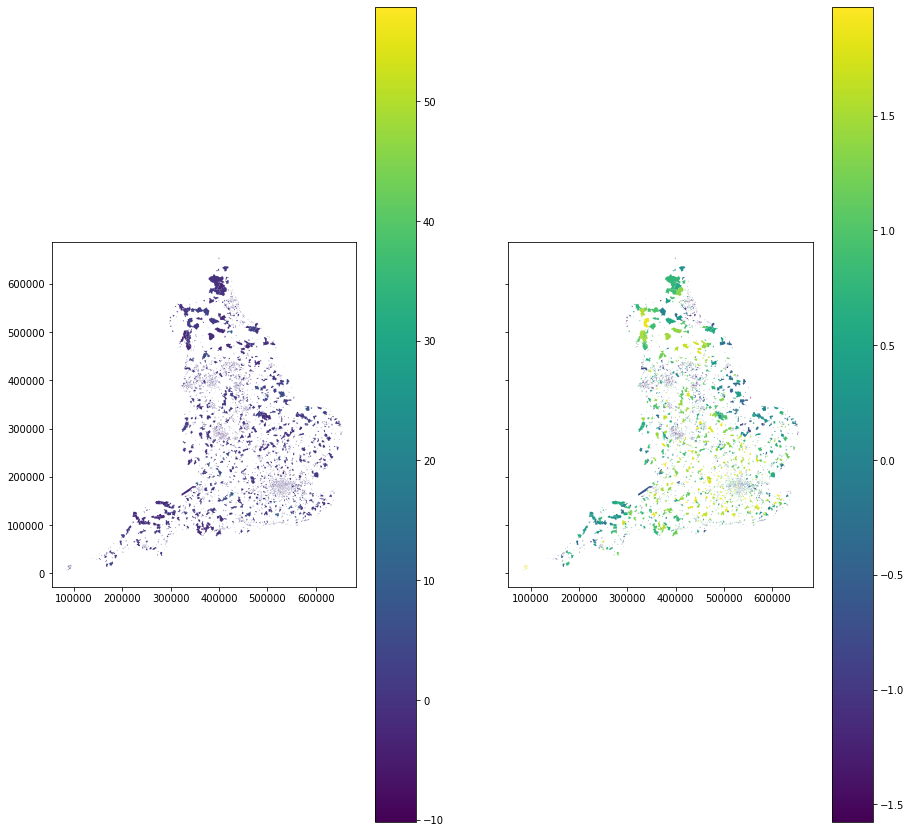

In [27]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(15,15))
scaled_geo_loneliness_imd.plot(ax=ax1, column='loneills', legend=True,cmap='viridis', marker='.')
scaled_geo_loneliness_imd.plot(ax=ax2, column='employment_score_zscore', legend=True, cmap='viridis',marker='.')

In [28]:
scaled_geo_loneliness_imd.describe()

,OBJECTID,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,Shape__Are,Shape__Len,loneills,imd_score,imd_rank,imd_decile,income_score,income_rank,income_decile,employment_score,employment_rate,employment_decile,poor_children_score,poor_children_rank,poor_children_decile,poor_older_score,poor_older_rank,poor_older_decile,young_sub_score,young_sub_rank,young_sub_decile,adult_skills_sub_score,adult_skills_sub_rank,adult_skills_sub_decile,aged_16-59_population,aged_over_60_population,working_age_population,imd_score_zscore,imd_rank_zscore,imd_decile_zscore,income_score_zscore,income_rank_zscore,income_decile_zscore,employment_score_zscore,employment_rate_zscore,employment_decile_zscore,poor_children_score_zscore,poor_children_rank_zscore,poor_children_decile_zscore,poor_older_score_zscore,poor_older_rank_zscore,poor_older_decile_zscore,young_sub_score_zscore,young_sub_rank_zscore,young_sub_decile_zscore,adult_skills_sub_score_zscore,adult_skills_sub_rank_zscore,adult_skills_sub_decile_zscore,aged_16-59_population_zscore,aged_over_60_population_zscore,working_age_population_zscore
count,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6.271000e+03,6271.000000,6271.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03
mean,15528.613459,456575.149737,273196.713283,-1.179550,52.347456,7349.016156,3.227987e+06,7348.766071,0.010620,24.693867,14563.770335,4.943541,0.166182,14229.228549,4.839872,14580.289793,0.133169,4.944498,0.206516,14662.295534,4.967464,0.220244,13796.324242,4.714992,0.076248,15454.240032,5.202711,0.315780,15671.153270,5.280383,1009.625518,367.973525,1015.246132,1.087912e-16,5.439562e-17,-1.269231e-16,-3.082418e-16,1.813187e-17,1.813187e-17,-1.087912e-16,1.269231e-16,1.269231e-16,-2.901100e-16,-7.252749e-17,-5.439562e-17,-7.252749e-17,7.252749e-17,-1.450550e-16,-1.246566e-17,-5.666210e-17,1.053915e-16,-1.813187e-17,-5.439562e-17,1.450550e-16,-7.252749e-17,1.450550e-16,9.065936e-17
std,9639.547275,84879.278225,124989.212066,1.227981,1.128549,9731.600352,1.293813e+07,9731.378123,2.302307,16.638630,9372.991762,2.830964,0.106687,8973.347762,2.717731,9244.528241,0.081638,2.799137,0.136226,9092.500737,2.757127,0.139180,9066.774791,2.743332,0.768597,9195.748959,2.789738,0.117488,9628.714004,2.913138,317.042450,149.562578,314.088414,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00
min,3.000000,91327.000000,11447.000000,-6.302170,49.923300,917.952728,4.634650e+04,917.952728,-10.184835,0.578000,3.000000,1.000000,0.005000,2.000000,1.000000,5.000000,0.006000,1.000000,0.004000,1.000000,1.000000,0.007000,1.000000,1.000000,-2.569000,1.000000,1.000000,0.034000,5.000000,1.000000,384.000000,9.000000,400.500000,-1.449506e+00,-1.553606e+00,-1.393114e+00,-1.510916e+00,-1.585625e+00,-1.413009e+00,-1.576765e+00,-1.557842e+00,-1.409296e+00,-1.486737e+00,-1.612589e+00,-1.439100e+00,-1.532271e+00,-1.521646e+00,-1.354298e+00,-3.441933e+00,-1.680611e+00,-1.506610e+00,-2.398572e+00,-1.627154e+00,-1.469454e+00,-1.973475e+00,-2.400347e+00,-1.957395e+00
25%,6975.000000,394697.000000,176469.000000,-2.080175,51.473950,3237.294574,2.649102e+05,3237.294574,-1.224389,11.467750,6436.250000,2.000000,0.082000,6579.500000,3.000000,6638.500000,0.072000,3

## Explore deciles

In [28]:
to_corr['loneills_decile'] = pd.qcut(to_corr['loneills'], 10, labels=False) + 1.0

In [33]:
to_corr[['loneills_decile', 'income_decile']]

,loneills_decile,income_decile
0,7.0,3.0
1,6.0,4.0
2,5.0,6.0
3,3.0,3.0
4,4.0,2.0
5,7.0,2.0
6,6.0,8.0
7,1.0,1.0
8,3.0,3.0
9,5.0,5.0


In [34]:
decile_counts = to_corr.value_counts(subset=['loneills_decile', 'income_decile'])
decile_counts = pd.DataFrame(decile_counts.values, index=decile_counts.index, columns=['count'])
decile_counts.reset_index(inplace=True)
decile_counts = decile_counts.pivot(index='loneills_decile', columns='income_decile', values='count')

In [35]:
decile_counts


income_decile,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
loneills_decile,,,,,,,,,,
1.0,169,106,107,66,52,39,38,22,15,13
2.0,114,113,80,60,67,52,43,38,32,28
3.0,81,80,105,71,84,62,53,36,37,18
4.0,84,82,69,84,81,60,68,39,42,18
5.0,76,66,78,77,83,69,61,57,42,18
6.0,76,58,87,89,81,59,57,52,42,26
7.0,56,59,61,78,70,72,58,75,60,38
8.0,66,76,68,72,59,60,71,58,54,43
9.0,58,50,61,52,82,69,73,81,48,53


In [36]:
fig = px.imshow(decile_counts)
fig.show()


### Repeat analysis at local authority level


In [35]:
agg_cols = {}

to_include = [x for x in list(data.columns) if x.endswith('_score') or x.endswith('_rank')]

for key in ['loneills'] + to_include:
    agg_cols[key] = 'mean'

for key in ['aged_under_15_population', 'aged_16-59_population', 'aged_over_60_population', 'total_population']:
    agg_cols[key] = 'sum'

for key in ['district_name']:
    agg_cols[key] = 'first'

data_LA = data.groupby(['district_code'], as_index=False).agg(agg_cols)

In [37]:
data_LA.head()

,district_code,loneills,imd_score,imd_rank,income_score,income_rank,employment_score,education_score,education_rank,health_score,health_rank,crime_score,crime_rank,housing_score,housing_rank,living_score,living_rank,poor_children_score,poor_children_rank,poor_older_score,poor_older_rank,young_sub_score,young_sub_rank,adult_skills_sub_score,adult_skills_sub_rank,geog_barriers_sub_score,geog_barriers_sub_rank,wider_barriers_sub_score,wider_barriers_sub_rank,indoor_sub_score,indoor_sub_rank,outdoor_sub_score,outdoor_sub_rank,aged_under_15_population,aged_16-59_population,aged_over_60_population,total_population,district_name
0,E06000001,-0.669530,43.928600,5004.300000,0.329800,3372.800000,3205.300000,41.921600,7179.200000,1.326500,3056.700000,0.130500,14729.700000,12.166700,26114.600000,9.688600,25089.900000,0.402200,4742.200000,0.361600,4609.600000,0.587700,9092.700000,0.443900,5945.400000,-0.400500,21431.500000,-0.896200,19993.100000,-1.086800,26544.100000,-0.094300,17489.300000,3454.0,9828.0,3909.0,17191.0,Hartlepool
1,E06000002,4.412327,52.641333,4819.000000,0.350917,4644.833333,5108.416667,53.863417,5754.250000,1.755833,2748.416667,0.952167,6097.000000,18.014667,19341.250000,20.557500,16993.000000,0.446917,4595.333333,0.395250,4967.583333,1.008583,6223.416667,0.455917,6059.166667,-0.737500,24953.916667,1.144083,10876.750000,-0.318750,18759.000000,0.301083,12013.250000,4185.0,13854.0,3303.0,21342.0,Middlesbrough
2,E06000003,0.524035,34.006636,9333.090909,0.242091,8242.454545,6365.454545,27.375182,12136.636364,1.093455,4976.454545,0.280727,12798.454545,7.179273,29501.272727,12.693182,22039.363636,0.289182,8691.545455,0.238273,12030.454545,0.249273,12887.090909,0.358455,11925.272727,-0.559818,23338.909091,-2.448636,26868.545455,-0.279364,19067.636364,-0.636545,24725.545455,2770.0,9201.0,4496.0,16467.0,Redcar and Cleveland
3,E06000004,-0.020585,37.622692,9398.230769,0.266077,8332.538462,7226.461538,34.585462,11254.923077,1.111538,5730.923077,0.310154,12232.769231,12.811846,25355.076923,12.174692,22862.307692,0.297231,9971.307692,0.282308,9486.230769,0.519308,10647.076923,0.363538,11983.923077,-0.356615,19923.076923,-0.956000,20305.076923,-0.557000,22632.076923,-0.212385,18905.615385,4049.0,12831.0,4521.0,21401.0,Stockton-on-Tees
4,E06000005,1.914055,26.531909,14803.090909,0.190636,12881.272727,11908.363636,22.879727,16558.181818,0.617364,10252.909091,0.403455,11225.181818,7.068091,29756.636364,15.265273,20162.818182,0.241273,13193.000000,0.205818,14613.363636,0.016455,16716.545455,0.309909,16069.727273,-0.743091,24627.454545,-2.758545,26374.454545,-0.401455,19385.181818,-0.192818,18789.636364,2987.0,9719.0,4004.0,16710.0,Darlington


In [40]:
employment_data_LA = data_LA[['loneills', 'district_code',
                            'imd_score', 'imd_rank', 'income_score', 'income_rank', 'employment_score', 'employment_rate',
                            'poor_children_score', 'poor_children_rank', 'poor_older_score', 'poor_older_rank',
                              'young_sub_score', 'young_sub_rank','adult_skills_sub_score', 'adult_skills_sub_rank',
                             'aged_16-59_population', 'aged_over_60_population',
       'working_age_population']]


KeyError: "['working_age_population', 'employment_rate'] not in index"